In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Preliminary Data Exploration**

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")

In [3]:
test_df.shape

(418, 11)

In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.duplicated().sum()

0

Looking at the data we can drop the ticket, name and cabin columns. The name and ticket numbers do not help us predict survivability while the cabin column consists of over 75% NaN values.

In [10]:
bad_cols = ['Cabin', 'Name', 'Ticket']
train_df.drop(axis=1, inplace=True, columns=bad_cols)
test_df.drop(axis=1, inplace=True, columns=bad_cols)

**Seperating Categorical and Numerical Columns**

In [11]:
num_cols = []

for col in train_df.columns:
    if train_df.dtypes[col] != 'object':
        num_cols.append(col)

num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
cat_cols = []

for col in train_df.columns:
    if train_df.dtypes[col] == 'object':
        cat_cols.append(col)

cat_cols

['Sex', 'Embarked']

**Exploring distributions**

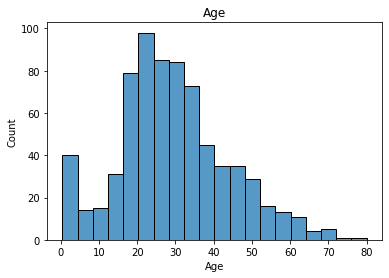

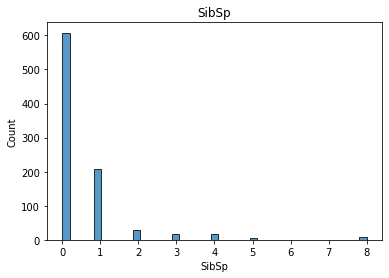

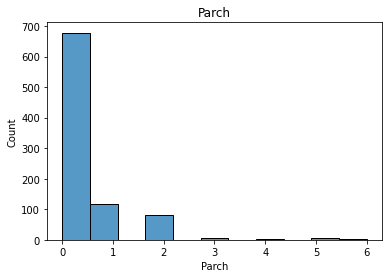

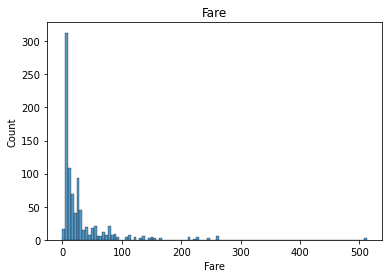

In [13]:
for item in ['Age', 'SibSp', 'Parch', 'Fare']:
    sns.histplot(data=train_df, x=item)
    plt.title(item)
    plt.show()

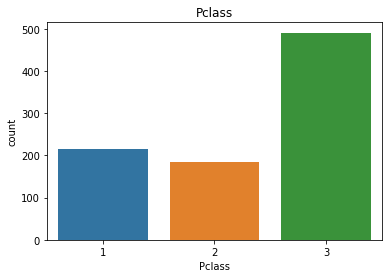

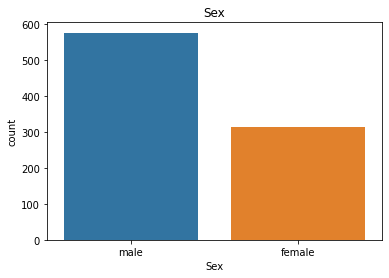

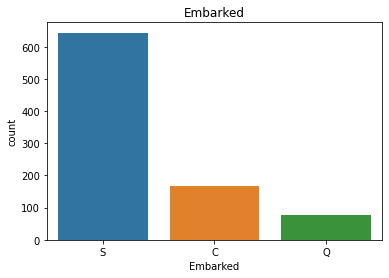

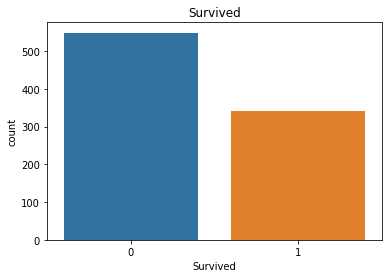

In [14]:
for item in ['Pclass', 'Sex', 'Embarked', 'Survived']:
    sns.countplot(data=train_df, x=item)
    plt.title(item)
    plt.show()

**Interpreting Numerical Data**

In [15]:
df_survived = train_df[train_df['Survived'] == 1]
df_survived[['Age', 'Fare']].mean()

Age     28.343690
Fare    48.395408
dtype: float64

In [16]:
df_died = train_df[train_df['Survived'] == 0]
df_died[['Age', 'Fare']].mean()

Age     30.626179
Fare    22.117887
dtype: float64

It looks as though fare price plays a large role in determining whether a passenger survives or not. Despite similar averages between the age of those who survived and those who did not does not mean that the variable is arbitrary. Lets take a closer look. 

**Age**

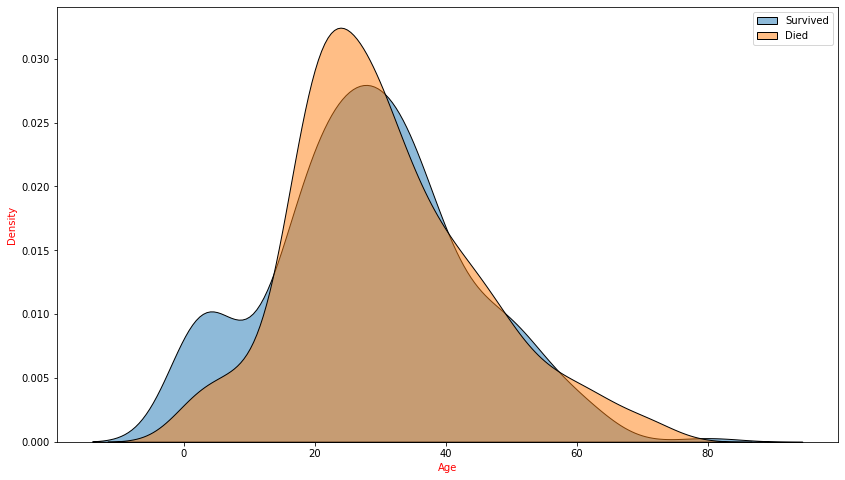

In [17]:
plt.figure(figsize=(14,8))
sns.kdeplot(data=df_survived, x='Age', shade=True, alpha=0.5, multiple='stack', label='Survived')
sns.kdeplot(data=df_died, x='Age', alpha=0.5,shade=True, multiple='stack', label='Died')
plt.xlabel("Age",color='red')
plt.ylabel("Density",color='red')
plt.legend()
plt.show()

This plot shows that young children, <5 years of age have a proportionally higher rate of survival while individuals aged over 60 are less likely to live.

**Fare**

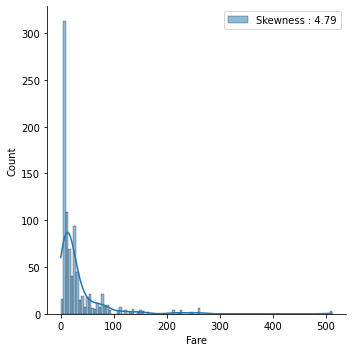

In [18]:
sns.displot(train_df.Fare, kde=True, label="Skewness : %.2f"%(train_df.Fare.skew()))
plt.legend()
plt.show()

The skew for the distribution of the fare variable is pretty large which may cause higher values to be disproportionately weighted. In order to amend this we will transform the fare values with the log function. There is also 1 NaN value in the test dataset that we will convert to the mean using the passenger class of the individual. 

In [19]:
test_df[test_df.Fare.isnull() == True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [20]:
train_df[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [21]:
test_df.Fare.fillna(13.68, inplace=True)
test_df[test_df.PassengerId == 1044]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,13.68,S


In [22]:
train_df.Fare = train_df.Fare.map(lambda i: np.log(i) if i > 0 else 0)
test_df.Fare = test_df.Fare.map(lambda i: np.log(i) if i > 0 else 0)

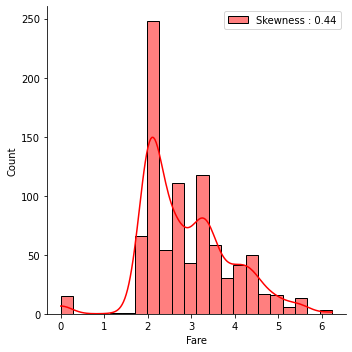

In [23]:
sns.displot(train_df.Fare, color='red', kde=True, label="Skewness : %.2f"%(train_df.Fare.skew()))
plt.legend()
plt.show()

**Interpreting Categorical Variables**

**Sex**

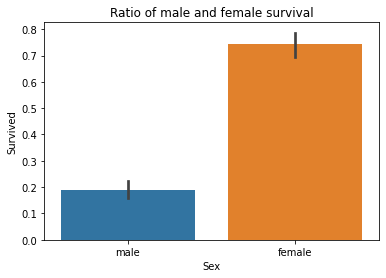

In [24]:
sns.barplot(data=train_df, x="Sex",y="Survived")
plt.title('Ratio of male and female survival')
plt.show()


There is a clear trend that females have a higher likelihood of surviving than males and that sex plays and important role in predicting survival. 

**Passenger Class**

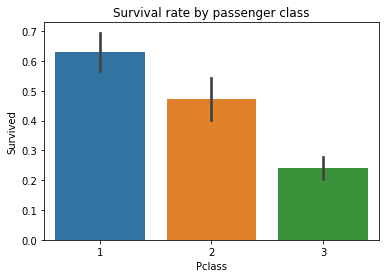

In [25]:
sns.barplot(data=train_df, x="Pclass",y="Survived")
plt.title('Survival rate by passenger class')
plt.show()


In [26]:
train_df[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


First class passengers have a higher likelihood of surviving. This is makes sense as we have already shown that paying higher fares is correlated with higher survival rate.

**Embarked**

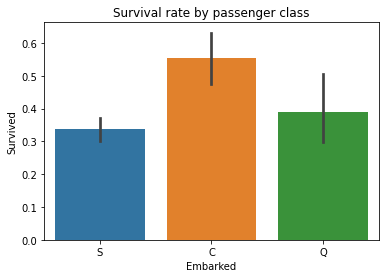

In [27]:
sns.barplot(data=train_df, x="Embarked",y="Survived")
plt.title('Survival rate by passenger class')
plt.show()

Interestingly, it looks as though individuals who embarked from Cherbourg have a higher likelihood of surviving than those who embarked from either Southampton or Queenstown. This is potentially because Cherbourg is where a higher ratio of first class passengers embarked. Lets see.

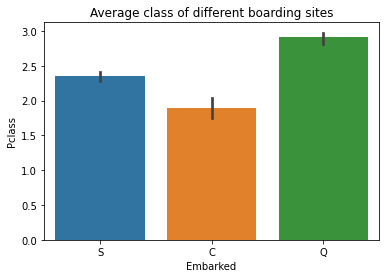

In [28]:
sns.barplot(data=train_df, x="Embarked",y="Pclass")
plt.title('Average class of different boarding sites')
plt.show()

In [29]:
train_df[['Pclass', 'Embarked']].groupby("Embarked").mean()

,Pclass
Embarked,
C,1.886905
Q,2.909091
S,2.350932


It seems that this theory is confirmed as the average Passenger class of Cherbourg is lower than either Queenstown or Southampton. Interestingly Queenstown consists of almost entirely third class passengers yet has a higher survival rate than those who embarked from Southampton. This may be due to Queenstown having more children (aged 0 - 5), more men, or perhaps other factors. 

**Number of Parents/Children aboard**

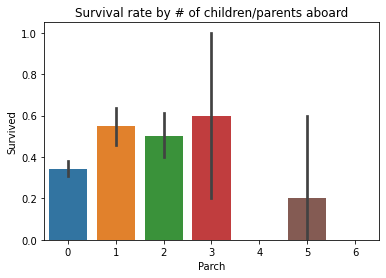

In [30]:
sns.barplot(data=train_df, x="Parch",y="Survived")
plt.title('Survival rate by # of children/parents aboard')
plt.show()

Having a medium sized family appears to more beneficial than traveling alone or with a large family. Notice a large standard deviation for families with 3 children/parents.

**Number of Siblings/Spouses**

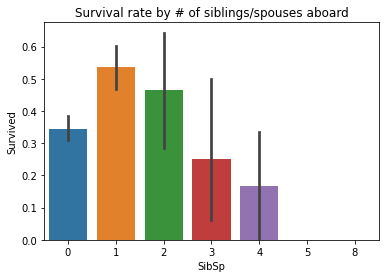

In [31]:
sns.barplot(data=train_df, x="SibSp",y="Survived")
plt.title('Survival rate by # of siblings/spouses aboard')
plt.show()

Having many siblings decreases survival rate. Traveling with 1 sibling/spouse is the most beneficial.  

**Filling Missing Values**

In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [33]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

**We'll replace embarked with the most common value**

In [34]:
train_df.Embarked.mode()

0    S
dtype: object

In [35]:
train_df.Embarked.fillna('S', inplace=True)

**Age**

Filling values for age is a bit more difficult than just filling in the average as there are factors that could be correlated to one's age group. Let's one hot encode to take a deeper look. 

**One Hot Encoding**

In [36]:
ohe_train_df = pd.get_dummies(train_df)
ohe_test_df = pd.get_dummies(test_df)
ohe_test_df.shape

(418, 11)

In [37]:
ohe_train_df.shape

(891, 12)

We will also merge the training and testing datasets in order to gain more information about the age category. This is not common practice in a real production model. However, it is beneficial in the case of a Kaggle competition where our model will never be used on truly unseen data. 

In [38]:
df_all =  pd.concat(objs=[ohe_train_df, ohe_test_df], axis=0).reset_index(drop=True)
df_all.sample()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
528,529,0.0,3,39.0,0,0,2.070022,0,1,0,0,1


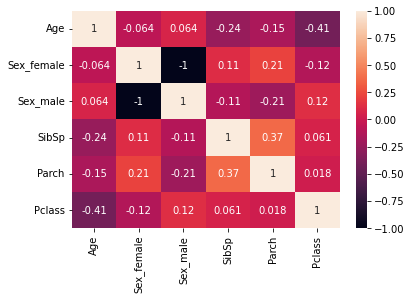

In [39]:
sns.heatmap(df_all[["Age", "Sex_female","Sex_male", "SibSp","Parch","Pclass"]].corr(), annot=True)
plt.show()

Parch, Pclass and SibSp seem to affect age to the greatest degree so we will use those factors to impute the age of the missing population. 

In [40]:
df_all['Age'] = df_all['Age'].fillna(df_all.groupby(['Pclass', 'Parch', 'SibSp'])['Age'].transform('mean'))

In [41]:
df_all.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Age              2
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [42]:
df_all[df_all['Age'].isna()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1233,1234,NaN,3,NaN,1,9,4.242046,0,1,0,0,1
1256,1257,NaN,3,NaN,1,9,4.242046,1,0,0,0,1


There are still two Nan values for age. This is due to the fact that there are no mean values for a family with a Parch of 9. We cannot drop these rows since they are part of the final testing dataset. Therefore we will will it with the age of 14.5 since that is the average age of the population with the closest approximate features.

In [43]:
df_all[['Age', 'Pclass', 'SibSp']].groupby(['Pclass', 'SibSp']).mean()

Age
Pclass SibSp           
1      0      39.257042
       1      39.878888
       2      39.125000
       3      23.500000
2      0      31.202324
       1      27.767317
       2      19.250000
       3      30.000000
3      0      27.186932
       1      23.535183
       2      20.659091
       3      11.693333
       4       8.772727
       5      10.166667
       8      14.500000

In [44]:
df_all['Age'].fillna(14.5, inplace=True)

In [45]:
df_all.Age.isna().sum()

0

We can split the dataset back into training and testing with the imputed values now. 

In [46]:
train = df_all[:len(train_df)]
test = df_all[len(train_df):]

In [47]:
test.drop(columns='Survived', inplace=True, axis=1)
train.drop(columns='PassengerId', inplace=True, axis=1)
test.drop(columns='PassengerId', inplace=True, axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Modeling**

We'll use several popular models and evaluat their accuracy using cross validation. 

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [49]:
X = train.drop(columns='Survived', axis=1)
y = train.Survived

In [50]:
r_state = 16

In [51]:
classifiers = ['gnb', 'lr', 'dtc', 'rfc', 'knn', 'svc', 'xgb', 'vc']
cv_scores = []

In [52]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.7823049400539828

In [53]:
lr = LogisticRegression(random_state=r_state, max_iter=2500)
cv = cross_val_score(lr, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.7901387232439896

In [54]:
dtc = DecisionTreeClassifier(random_state=r_state)
cv = cross_val_score(dtc, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.7733601154980855

In [55]:
rfc = RandomForestClassifier(random_state=r_state)
cv = cross_val_score(rfc, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.8081099742640134

In [56]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.7878915322327538

In [57]:
svc = SVC(random_state=r_state, probability=True)
cv = cross_val_score(svc, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.7228297030945955

In [58]:
xgb = XGBClassifier(random_state=r_state)
cv = cross_val_score(xgb, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.8103634423451131

In [59]:
vc = VotingClassifier(estimators = [('lr',lr),('knn',knn),('dtc',dtc),('rfc',rfc),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(vc, X, y, cv=5)
cv_scores.append(cv.mean())
cv.mean()

0.8226916075575922

In [60]:
model_scores = pd.DataFrame({'Model': classifiers, 'Scores': cv_scores})
model_scores

,Model,Scores
0,gnb,0.782305
1,lr,0.790139
2,dtc,0.773360
3,rfc,0.808110
4,knn,0.787892
5,svc,0.722830
6,xgb,0.810363
7,vc,0.822692


It appears the soft voting classifier performed the best. Let's see if we can improve performance.

**Model Tuning**

In [61]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [62]:
tuned_scores = []

Bayesion model doesn't have any significant tuning. 

In [63]:
tuned_scores.append('NA')

Logistic Regression

In [64]:
params = {'max_iter' : [250, 500, 750, 1000, 1500, 2500, 5000],
              'penalty' : ['l1', 'l2'],
              'solver' : ['liblinear']}

lr_gs = GridSearchCV(lr, param_grid = params, cv = 5, verbose = False, n_jobs = -1)
lr_gs.fit(X, y)
lr_gs.best_estimator_

LogisticRegression(max_iter=250, random_state=16, solver='liblinear')

In [65]:
best_lr = LogisticRegression(max_iter=500, penalty='l2', random_state=16, solver='liblinear')

In [66]:
tuned_scores.append(lr_gs.best_score_)
lr_gs.best_score_

0.7901324461741259

Decision Tree Classifier

In [67]:
params = {'max_depth': [3, 5, 10, 20, 30],
          'criterion' : ['gini', 'entropy'],
          'min_samples_leaf' : [1, 3, 5, 10],
         'min_samples_split' : [2, 5, 10],
         'max_features' : ['sqrt', len(X.columns)]}

dtc_rs = RandomizedSearchCV(dtc, n_iter = 50, param_distributions = params, cv = 5, verbose = False, n_jobs = -1)

dtc_rs.fit(X, y)
dtc_rs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=16)

In [68]:
params = {'max_depth': [4, 5, 6, 7],
          'min_samples_leaf' : [4, 5, 6, 7],
         'min_samples_split' : [4, 5, 6]}

dtc_gs = GridSearchCV(dtc, param_grid = params, cv = 5, verbose = False, n_jobs = -1)
dtc_gs.fit(X, y)
dtc_gs.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=4,
                       random_state=16)

In [69]:
best_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=10,
                       min_samples_leaf=6, min_samples_split=4,
                       random_state=16)

In [70]:
tuned_scores.append(dtc_gs.best_score_)
dtc_gs.best_score_

0.8193082669010107

Random Forest

In [71]:
'''params = {'n_estimators' : [100, 250, 500, 750, 1000],
          'max_depth': [3, 5, 10, 20],
          'criterion' : ['gini', 'entropy'],
          'min_samples_split' : [2, 5, 7, 10],
          'min_samples_leaf' : [2, 4, 6]}

rfc_rs = RandomizedSearchCV(rfc, n_iter = 50, param_distributions = params, cv = 5, verbose = False, n_jobs = -1)

rfc_rs.fit(X, y)
rfc_rs.best_estimator_ '''

"params = {'n_estimators' : [100, 250, 500, 750, 1000],\n          'max_depth': [3, 5, 10, 20],\n          'criterion' : ['gini', 'entropy'],\n          'min_samples_split' : [2, 5, 7, 10],\n          'min_samples_leaf' : [2, 4, 6]}\n\nrfc_rs = RandomizedSearchCV(rfc, n_iter = 50, param_distributions = params, cv = 5, verbose = False, n_jobs = -1)\n\nrfc_rs.fit(X, y)\nrfc_rs.best_estimator_ "

In [72]:
params = {'n_estimators' : [700, 800, 900],
          'max_depth': [9, 10, 11],
          'min_samples_split' : [4, 5, 6],
          'min_samples_leaf' : [2, 3]}

rfc_gs = GridSearchCV(rfc, param_grid = params, cv = 5, verbose = False, n_jobs = -1)
rfc_gs.fit(X, y)
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=900, random_state=16)

In [73]:
best_rfc = RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=900, random_state=16)

In [74]:
tuned_scores.append(rfc_gs.best_score_)
rfc_gs.best_score_

0.8327851358985624

K Nearest Neighbors

In [75]:
params = {'n_neighbors' : [5,7,9,11],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree']}
knn_gs = GridSearchCV(knn, param_grid = params, cv = 5, verbose = False, n_jobs = -1)
knn_gs.fit(X, y)
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [76]:
best_knn = KNeighborsClassifier(n_neighbors=9, weights='distance')

In [77]:
tuned_scores.append(knn_gs.best_score_)
knn_gs.best_score_

0.7946331052664617

Support Vector Classifier

In [78]:
params = {'kernel': ['rbf'], 
          'gamma': [.1, .5, 1, 5], 
          'C': [.1, 1, 10, 100]}
                            
svc_gs = GridSearchCV(svc, param_grid = params, cv = 5, verbose = False, n_jobs = -1)
svc_gs.fit(X, y)
svc_gs.best_estimator_

SVC(C=1, gamma=0.1, probability=True, random_state=16)

In [79]:
best_svc = SVC(C=1, gamma=0.1, probability=True, random_state=16)

In [80]:
tuned_scores.append(svc_gs.best_score_)
svc_gs.best_score_

0.8125918021467579

XGBoost

In [81]:
'''  params = {
    'n_estimators': [250, 500, 750, 1000, 1200],
    'max_depth': [2, 5, 7, 10],
    'learning_rate': [0.05, 0.08, 0.1, 0.15],
    'min_child_weight' : [0, .01, 0.1, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_rs = RandomizedSearchCV(xgb, n_iter = 50, param_distributions = params, cv = 5, verbose = False, n_jobs = -1)

xgb_rs.fit(X, y)
xgb_rs.best_estimator_ '''

"  params = {\n    'n_estimators': [250, 500, 750, 1000, 1200],\n    'max_depth': [2, 5, 7, 10],\n    'learning_rate': [0.05, 0.08, 0.1, 0.15],\n    'min_child_weight' : [0, .01, 0.1, 1],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2]\n}\n\nxgb_rs = RandomizedSearchCV(xgb, n_iter = 50, param_distributions = params, cv = 5, verbose = False, n_jobs = -1)\n\nxgb_rs.fit(X, y)\nxgb_rs.best_estimator_ "

In [82]:
params = {
    'n_estimators': [400, 500, 600],
    'max_depth': [5, 7],
    'min_child_weight' : [0.01, 0.05],
    'learning_rate': [0.01, 0.03],
    'reg_alpha': [1],
    'reg_lambda':[1.5]
}


xgb_gs = GridSearchCV(xgb, param_grid = params, cv = 5, verbose = False, n_jobs = -1)
xgb_gs.fit(X, y)
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=0.01, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=16, reg_alpha=1, reg_lambda=1.5, ...)

In [83]:
tuned_scores.append(xgb_gs.best_score_)
xgb_gs.best_score_

0.839539263071998

In [84]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=0.01, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=16, reg_alpha=1, reg_lambda=1.5)

Voting Classifier

Some models performed better than others perhaps the voting classifier will perform better if some estimators are excluded from the vote. We'll also experiment with hard vs soft classifiers

In [85]:
tuned_scores.append('NA')
model_scores['Tuned Scores'] = tuned_scores

In [86]:
model_scores

,Model,Scores,Tuned Scores
0,gnb,0.782305,NA
1,lr,0.790139,0.790132
2,dtc,0.773360,0.819308
3,rfc,0.808110,0.832785
4,knn,0.787892,0.794633
5,svc,0.722830,0.812592
6,xgb,0.810363,0.839539
7,vc,0.822692,NA


In [87]:
vc_soft_all = VotingClassifier(estimators = [('lr',lr),('knn',knn),('dtc',dtc),('rfc',rfc),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
vc_hard_all = VotingClassifier(estimators = [('lr',lr),('knn',knn),('dtc',dtc),('rfc',rfc),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'hard')
vc_soft_best = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rfc',rfc),('svc',svc),('xgb',xgb)], voting = 'soft')
vc_hard_best = VotingClassifier(estimators = [('lr',lr),('dtc',dtc),('rfc',rfc),('svc',svc),('xgb',xgb)], voting = 'hard')

print(f'Soft classifier (all): {cross_val_score(vc_soft_all, X, y, cv=5).mean()}')
print(f'Hard classifier (all): {cross_val_score(vc_hard_all, X, y, cv=5).mean()}')
print(f'Soft classifier (best): {cross_val_score(vc_soft_best, X, y, cv=5).mean()}')
print(f'Hard classifier (best): {cross_val_score(vc_hard_best, X, y, cv=5).mean()}')

Soft classifier (all): 0.8226916075575922
Hard classifier (all): 0.8249387985688281
Soft classifier (best): 0.8238340342728014
Hard classifier (best): 0.8260686711443098


Suprisingly, after playing around with different estimators it appears the hard voting classifier performs best.

**Predictions**

We'll submit the predictions from all voting classifiers and also xgboost and the random forest model since they performed comparatively well in training. 

In [88]:
vc_soft_all.fit(X, y)
vc_hard_all.fit(X, y)
vc_soft_best.fit(X, y)
vc_hard_best.fit(X, y)
best_xgb.fit(X, y)
best_rfc.fit(X, y)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=900, random_state=16)

In [89]:
vsa_pred = vc_soft_all.predict(test)
vch_pred = vc_hard_all.predict(test)
vsb_pred = vc_soft_best.predict(test)
vhb_pred = vc_hard_best.predict(test)
xgb_pred = best_xgb.predict(test)
rfc_pred = best_rfc.predict(test)

In [90]:
test.index = test.index + 1

In [91]:
vsa_output = pd.DataFrame({'PassengerId': test.index, 'Survived': vsa_pred})
vsa_output['Survived'] = vsa_output['Survived'].astype(int)
vsa_output.to_csv('vsa.csv', index=False)

vch_output = pd.DataFrame({'PassengerId': test.index, 'Survived': vch_pred})
vch_output['Survived'] = vch_output['Survived'].astype(int)
vch_output.to_csv('vch.csv', index=False)

vsb_output = pd.DataFrame({'PassengerId': test.index, 'Survived': vsb_pred})
vsb_output['Survived'] = vsb_output['Survived'].astype(int)
vsb_output.to_csv('vsb.csv', index=False)

vhb_output = pd.DataFrame({'PassengerId': test.index, 'Survived': vhb_pred})
vhb_output['Survived'] = vhb_output['Survived'].astype(int)
vhb_output.to_csv('vhb.csv', index=False)

xgb_output = pd.DataFrame({'PassengerId': test.index, 'Survived': xgb_pred})
xgb_output.to_csv('xgb.csv', index=False)

rfc_output = pd.DataFrame({'PassengerId': test.index, 'Survived': rfc_pred})
rfc_output['Survived'] = rfc_output['Survived'].astype(int)
rfc_output.to_csv('rfc.csv', index=False)
